<a href="https://colab.research.google.com/github/ilyadash/pytorch-deep-learning/blob/main/my_loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 Loan Default Prediction - Data Analysis and Visualization</h1>

# IMPORT DATA

In [1]:
import warnings
warnings.filterwarnings("ignore")
import torch as tr
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
file_name = 'Loan_default.csv'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Loan_default.csv to Loan_default.csv


In [4]:
import io
data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


# CHECK DATA

In [5]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

# LABEL ENCODER

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    data[col] = le.fit_transform(data[col])

data = data.drop(['LoanID'], axis=1)

In [8]:
data.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

# CORRELATIONS WITH TARGET

In [9]:
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


<Axes: >

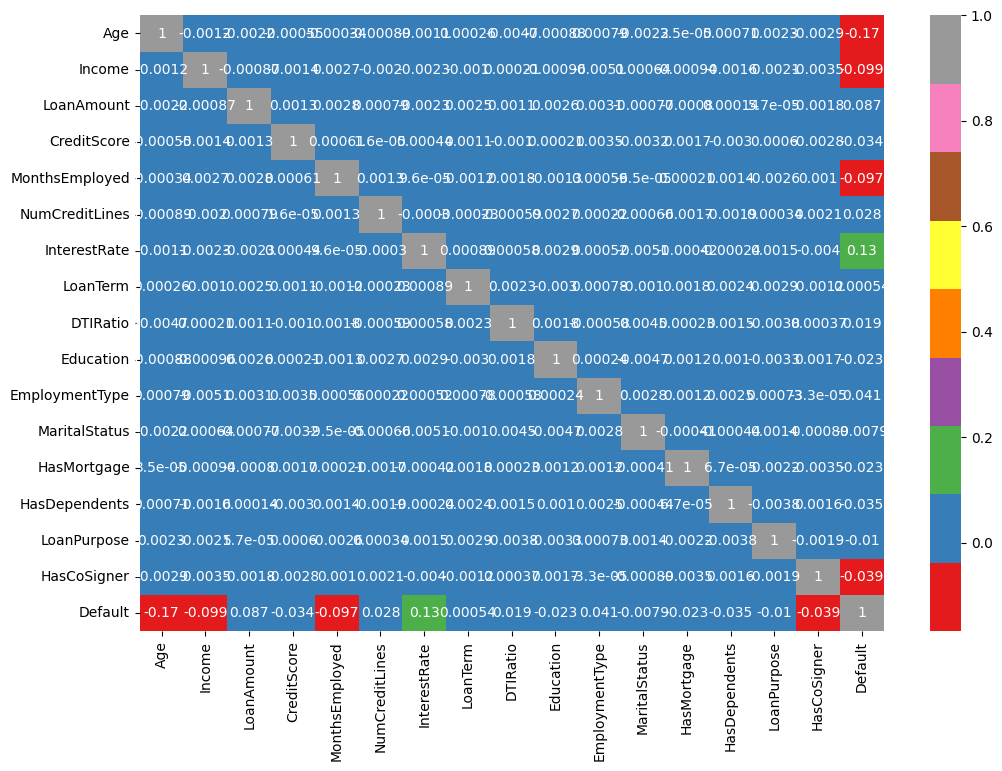

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr2 = data.corr()
sns.heatmap(corr2, annot=True, cmap='Set1')

# SPLIT DATA FOR CLASSIFICATION

In [11]:
X = data.drop(['Default'], axis=1)
y = data['Default']

# TAKE SIX DIFFERENT MODELS - CLASSIFIERS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

models = [
    XGBClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precision: {score:.2f}')

XGBClassifier - Precision: 0.89
RandomForestClassifier - Precision: 0.89
LogisticRegression - Precision: 0.88
KNeighborsClassifier - Precision: 0.87
GaussianNB - Precision: 0.88


# TRY PYTORCH


In [23]:
X_train = tr.tensor(X_train.values)
X_test = tr.tensor(X_test.values)
y_train = tr.tensor(y_train.values)
y_test = tr.tensor(y_test.values)

RuntimeError: ignored

In [28]:
X_train = X_train.to(tr.float32)
X_test = X_test.to(tr.float32)
y_train = y_train.to(tr.float32)
y_test = y_test.to(tr.float32)

In [29]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.size())
print(X_test.size())
print(y_train.size())
print(y_test.size())

tensor([[1.8000e+01, 1.3758e+05, 2.0914e+05,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [4.7000e+01, 5.7194e+04, 5.9700e+03,  ..., 1.0000e+00, 2.0000e+00,
         0.0000e+00],
        [2.6000e+01, 8.4328e+04, 9.5065e+04,  ..., 0.0000e+00, 4.0000e+00,
         1.0000e+00],
        ...,
        [6.2000e+01, 3.4372e+04, 5.9645e+04,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.4000e+01, 1.4626e+05, 1.9845e+05,  ..., 0.0000e+00, 3.0000e+00,
         0.0000e+00],
        [3.6000e+01, 9.7844e+04, 1.8859e+05,  ..., 0.0000e+00, 3.0000e+00,
         0.0000e+00]])
tensor([[5.5000e+01, 1.1266e+05, 9.2393e+04,  ..., 1.0000e+00, 3.0000e+00,
         0.0000e+00],
        [5.6000e+01, 9.1569e+04, 1.3158e+05,  ..., 1.0000e+00, 2.0000e+00,
         1.0000e+00],
        [2.6000e+01, 7.8169e+04, 7.5417e+04,  ..., 1.0000e+00, 2.0000e+00,
         1.0000e+00],
        ...,
        [6.7000e+01, 8.8507e+04, 1.4267e+05,  ..., 0.0000e+00, 2.0000e+00,
         0.0000e+00],
   

In [30]:
device = "cuda" if tr.cuda.is_available() else "cpu"
device

'cpu'

In [31]:
from torch import nn

In [36]:
# 1. Construct a model class that subclasses nn.Module
class PersonalDefaultModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=16, out_features=20) #
        self.layer_2 = nn.Linear(in_features=20, out_features=20) #
        self.layer_3 = nn.Linear(in_features=20, out_features=1) #
        self.relu = nn.ReLU()
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_3(self.layer_2(self.layer_1(x))) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = PersonalDefaultModelV0().to(device)
model_0

PersonalDefaultModelV0(
  (layer_1): Linear(in_features=16, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [37]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = tr.optim.SGD(params=model_0.parameters(), lr=0.1)

In [38]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = tr.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [40]:
# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = tr.round(tr.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(tr.sigmoid(y_logits), # Using nn.BCELoss you need tr.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with tr.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = tr.round(tr.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 469.15683, Accuracy: 88.37% | Test Loss: 537025904640.00000, Test Accuracy: 11.55%
Epoch: 10 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 20 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 30 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 40 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 50 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 60 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 70 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 80 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
Epoch: 90 | Loss: nan, Accuracy: 0.00% | Test Loss: nan, Test Accuracy: 0.00%
